In [2]:
import numpy as np
import matplotlib.pyplot as plt

# J < 0: Ferromagnetic, J > 0: Antiferromagnetic
# Takes a configuration and the coefficient J and computes the energy.
def energy(conf, J):
    X, Y = conf.shape
    E = 0
    for x in range(X):
        for y in range(Y):
            E += J*conf[x,y]*conf[(x+1)%X,y]
            E += J*conf[x,y]*conf[x,(y+1)%Y]
    return E

# Computes the variation in energy for a spin flip given the configuration
# and the coordinates of the flipping site.
def calc_dE(conf, x, y, J):
    X, Y = conf.shape
    dE = 0
    dE -= 2*J * conf[x,y]*conf[(x-1)%X,y]
    dE -= 2*J * conf[x,y]*conf[(x+1)%X,y] 
    dE -= 2*J * conf[x,y]*conf[x,(y-1)%Y]
    dE -= 2*J * conf[x,y]*conf[x,(y+1)%Y]
    return dE


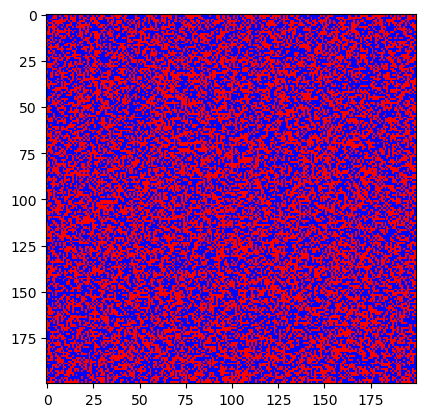

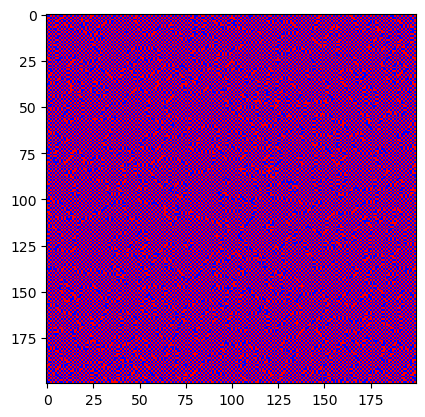

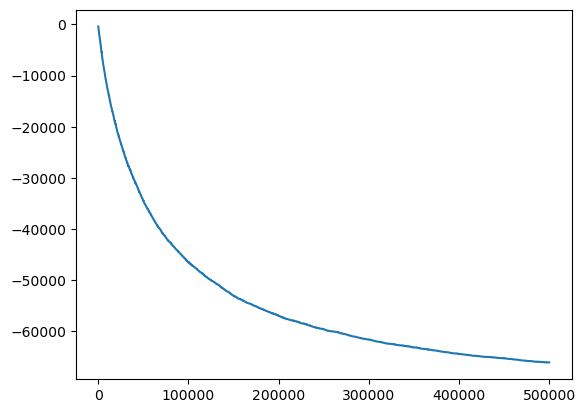

In [6]:
X = 200
Y = 200
J = 1 
T = 1 # temperature

# Initial state
conf = np.random.choice([1,-1], (X,Y))
conf[20,20]=-1

# Initial energy
E = energy(conf, J)
Es = [E] # we track the evolution of the energy

# Plot initial state
#plt.figure(figsize=(10, 10))
plt.imshow(conf, cmap='bwr', interpolation='none')
plt.show()

# We apply the metropolis algorithm N times
N = 500000
for i in range(N):
    # A site is chosen at random
    x = np.random.randint(0, X)
    y = np.random.randint(0, Y)

    # Compute the change in energy if we flip that site
    dE = calc_dE(conf, x, y, J)
    # Transition probability
    p = np.exp(-dE/T)
    # If the energy decreases, the site flips
    if dE <= 0:
        conf[x,y] = -conf[x,y]
        E += dE
    # If the energy increases, the site flips with probability p.
    elif np.random.rand() <= p:
            conf[x,y] = -conf[x,y]
            E += dE
    '''
    # This version flips always with probability p.
    if np.random.rand() <= p:
        conf[x,y] = -conf[x,y]
        E += dE
    '''
    Es.append(E)
        
#plt.figure(figsize=(10, 10))
plt.imshow(conf, cmap='bwr', interpolation='none')
plt.show()
plt.plot(Es)

plt.show()

The algorithm runs in O(N)! (N being the number of iterations). A bigger system doesn't take longer, as numpy array access is O(1) and each iteration only accesses the array and computes the energy difference, which takes 4 calculations.